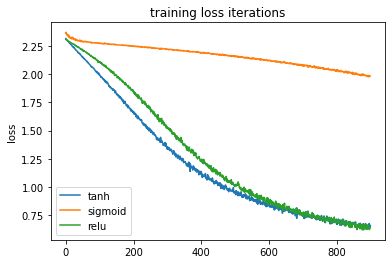

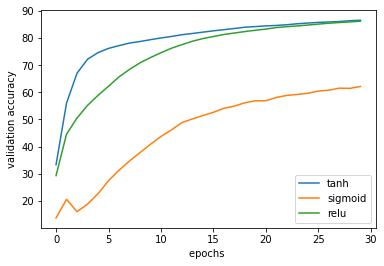

In [10]:
import torch
from torch import nn,optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import DataLoader
import torch.nn.functional as F


size = 28*28

def train (model, train_loader, valid_loader,valid_dataset,optimiser,criterion,epochs):

  useful_stuff = { 'training_loss': [], 
                   'validation_accuracy': []}
  
  for epoch in range(epochs):

    for x,y in train_loader:
      z = model(x.view(-1,size))
      loss = criterion(z,y)
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()
      useful_stuff['training_loss'].append(loss.item())

    correct=0
    for x,y in valid_loader:
      z = model(x.view(-1,size))
      _,yhat = z.max(1)
      correct+=(yhat==y).sum().item()
    accuracy = 100 *(correct/len(valid_dataset))
    useful_stuff['validation_accuracy'].append(accuracy)
  
  return useful_stuff




train_dataset = dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
valid_dataset = dsets.MNIST(root='./data',train=False,transform= transforms.ToTensor(),download=True)

criterion = nn.CrossEntropyLoss()

epochs = 30
learning_rate = 0.01
in_ = size
neurons = 100
out_ = 10

train_loader = DataLoader(dataset=train_dataset,batch_size=2000,shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset,batch_size=5000,shuffle=False)

# Sigmoid
model_Sigmoid = nn.Sequential(nn.Linear(in_,neurons),nn.Sigmoid(),nn.Linear(neurons,out_))
optimiser = optim.SGD(model_Sigmoid.parameters(),lr = learning_rate)
sigmoid_result = train(model_Sigmoid,train_loader,valid_loader,valid_dataset,optimiser,criterion,epochs)

# Tanh
model_Tanh = nn.Sequential(nn.Linear(in_,neurons),nn.Tanh(),nn.Linear(neurons,out_))
optimiser = optim.SGD(model_Tanh.parameters(),lr=learning_rate)
tanh_result= train(model_Tanh,train_loader,valid_loader,valid_dataset,optimiser,criterion,epochs)

# Relu
model_Relu = nn.Sequential(nn.Linear(in_,neurons),nn.ReLU(),nn.Linear(neurons,out_))
optimiser = optim.SGD(model_Relu.parameters(),lr = learning_rate)
relu_result = train(model_Relu,train_loader,valid_loader,valid_dataset,optimiser,criterion,epochs)



plt.plot(tanh_result['training_loss'], label='tanh')
plt.plot(sigmoid_result['training_loss'], label='sigmoid')
plt.plot(relu_result['training_loss'], label='relu')
plt.ylabel('loss')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()


# Compare the validation loss

plt.plot(tanh_result['validation_accuracy'], label='tanh')
plt.plot(sigmoid_result['validation_accuracy'], label='sigmoid')
plt.plot(relu_result['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()